<a href="https://colab.research.google.com/github/subair99/ML_Zoomcamp_2022/blob/main/ML_Zoomcamp_Session__3_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Homework

### Dataset
In this homework, we will use the California Housing Prices data from Kaggle.

Here's a wget-able link:

wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

We'll keep working with the 'median_house_value' variable, and we'll transform it to a classification task.

The goal of this homework is to create a regression model for predicting housing prices (column 'median_house_value').

### Features
For the rest of the homework, you'll need to use only these columns:

  1. 'latitude',
  2. 'longitude',
  3. 'housing_median_age',
  4. 'total_rooms',
  5. 'total_bedrooms',
  6. 'population',
  7. 'households',
  8. 'median_income',
  9. 'median_house_value'
  10. 'ocean_proximity'

In [72]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab_Notebooks/ML_Zoomcamp_2022

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab_Notebooks/ML_Zoomcamp_2022


In [73]:
# Import required models
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

### Data preparation
1. Select only the features from above and fill in the missing values with 0.
2. Create a new column rooms_per_household by dividing the column total_rooms by the column households from dataframe.
3. Create a new column bedrooms_per_room by dividing the column total_bedrooms by the column total_rooms from dataframe.
4. Create a new column population_per_household by dividing the column population by the column households from dataframe.

In [6]:
# Read dataset to dataframe
df = pd.read_csv('ML_Zoomcamp_Session_#3_data.csv')

In [7]:
# Check dataset
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
# Check missing values
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:

# Fill missing values with 0
df.fillna(0, inplace=True)

In [10]:
# Check missing values again
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [11]:
# Create new columns
df['rooms_per_household'] = df.total_rooms / df.households
df['bedrooms_per_room'] = df.total_bedrooms / df.total_rooms
df['population_per_household'] = df.population / df.households

### Question 1
What is the most frequent observation (mode) for the column ocean_proximity?

Options:

1. NEAR BAY
2. <1H OCEAN
3. INLAND
4. NEAR OCEAN

In [12]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Answer: <1H OCEAN

### Split the data
1. Split your data in train/val/test sets, with 60%/20%/20% distribution.
2. Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
3. Make sure that the target value (median_house_value) is not in your dataframe.

In [13]:
# Split to full_train and test
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [14]:

# Split to train and val
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [15]:
# Check length of splits
len(df_train), len(df_val), len(df_test)

(12384, 4128, 4128)

In [16]:
# Reset index
df_train.reset_index(drop=True)
df_val.reset_index(drop=True)
df_test.reset_index(drop=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-119.01,36.06,25.0,1505.0,0.0,1392.0,359.0,1.6812,47700.0,INLAND,4.192201,0.000000,3.877437
1,-119.46,35.14,30.0,2943.0,0.0,1565.0,584.0,2.5313,45800.0,INLAND,5.039384,0.000000,2.679795
2,-122.44,37.80,52.0,3830.0,0.0,1310.0,963.0,3.4801,500001.0,NEAR BAY,3.977155,0.000000,1.360332
3,-118.72,34.28,17.0,3051.0,0.0,1705.0,495.0,5.7376,218600.0,<1H OCEAN,6.163636,0.000000,3.444444
4,-121.93,36.62,34.0,2351.0,0.0,1063.0,428.0,3.7250,278000.0,NEAR OCEAN,5.492991,0.000000,2.483645
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4123,-117.22,33.36,16.0,3165.0,482.0,1351.0,452.0,4.6050,263300.0,<1H OCEAN,7.002212,0.152291,2.988938
4124,-120.83,35.36,28.0,4323.0,886.0,1650.0,705.0,2.7266,266800.0,NEAR OCEAN,6.131915,0.204950,2.340426
4125,-122.05,37.31,25.0,4111.0,538.0,1585.0,568.0,9.2298,500001.0,<1H OCEAN,7.237676,0.130868,2.790493
4126,-119.76,36.77,36.0,2507.0,466.0,1227.0,474.0,2.7850,72300.0,INLAND,5.289030,0.185880,2.588608


In [17]:
# Create target values
y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

In [18]:
# Delete median_house_value columns
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

### Question 2
  1. Create the correlation matrix for the numerical features of your train dataset.
  2. In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
  3. What are the two features that have the biggest correlation in this dataset?

Options:

1. total_bedrooms and households
2. total_bedrooms and total_rooms
3. population and households
4. population_per_household and total_rooms

In [19]:
# Correlation matrix for the numerical features
full_corr = df_full_train.select_dtypes(include='number').corr()
full_corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.924485,-0.101818,0.038676,0.063064,0.094276,0.049306,-0.017040,-0.046349,-0.029339,0.097280,-0.000598
latitude,-0.924485,1.000000,0.005296,-0.029224,-0.059998,-0.102499,-0.064061,-0.076571,-0.142983,0.110695,-0.118938,0.005837
housing_median_age,-0.101818,0.005296,1.000000,-0.360922,-0.320624,-0.292283,-0.302796,-0.121711,0.103706,-0.160892,0.135495,0.016245
total_rooms,0.038676,-0.029224,-0.360922,1.000000,0.930489,0.857936,0.920482,0.198268,0.133989,0.136090,-0.189316,-0.024991
total_bedrooms,0.063064,-0.059998,-0.320624,0.930489,1.000000,0.878932,0.980255,-0.009141,0.047980,-0.001659,0.084149,-0.028536
population,0.094276,-0.102499,-0.292283,0.857936,0.878932,1.000000,0.907452,0.004122,-0.026032,-0.073733,0.035134,0.072330
households,0.049306,-0.064061,-0.302796,0.920482,0.980255,0.907452,1.000000,0.012776,0.063714,-0.083062,0.064185,-0.027656
median_income,-0.017040,-0.076571,-0.121711,0.198268,-0.009141,0.004122,0.012776,1.000000,0.690647,0.336013,-0.616669,0.022061
median_house_value,-0.046349,-0.142983,0.103706,0.133989,0.047980,-0.026032,0.063714,0.690647,1.000000,0.158485,-0.257419,-0.022030
rooms_per_household,-0.029339,0.110695,-0.160892,0.136090,-0.001659,-0.073733,-0.083062,0.336013,0.158485,1.000000,-0.435169,-0.004922


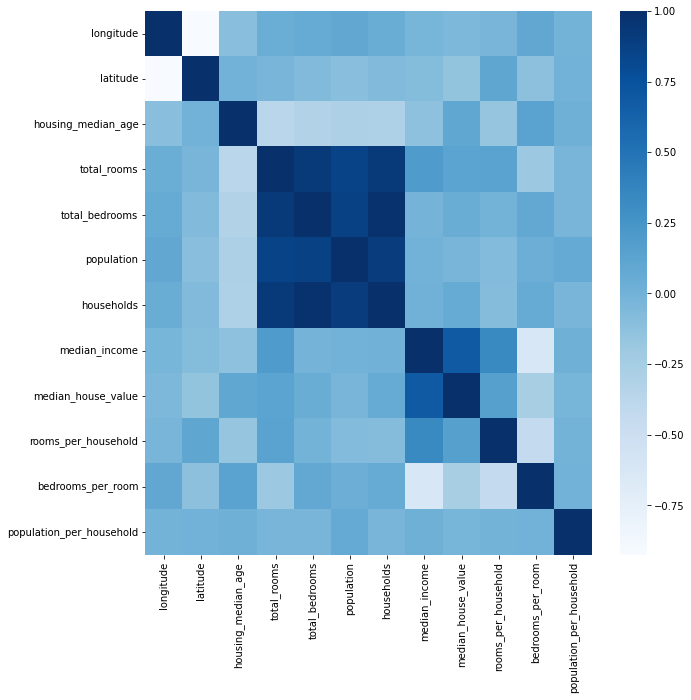

In [20]:
# Heatmap of the correlation matrix
plt.figure(figsize = (10,10))
sns.heatmap(full_corr, cmap='Blues');

In [21]:
corr_dict = {}
for col in list(full_corr.columns.to_list()):
  corr_dict[col] = full_corr[col].nlargest(2)[1]

corr_dict

{'longitude': 0.09728042743231076,
 'latitude': 0.11069480271319962,
 'housing_median_age': 0.13549477398605864,
 'total_rooms': 0.9304892875010856,
 'total_bedrooms': 0.9802545152967752,
 'population': 0.9074517390523992,
 'households': 0.9802545152967752,
 'median_income': 0.6906466061467701,
 'median_house_value': 0.6906466061467701,
 'rooms_per_household': 0.336012863410619,
 'bedrooms_per_room': 0.13549477398605864,
 'population_per_household': 0.07232952058044864}

In [22]:
corr_series = pd.Series(corr_dict)
corr_series

longitude                   0.097280
latitude                    0.110695
housing_median_age          0.135495
total_rooms                 0.930489
total_bedrooms              0.980255
population                  0.907452
households                  0.980255
median_income               0.690647
median_house_value          0.690647
rooms_per_household         0.336013
bedrooms_per_room           0.135495
population_per_household    0.072330
dtype: float64

In [23]:
corr_series[corr_series == corr_series.max()]

total_bedrooms    0.980255
households        0.980255
dtype: float64

Answer: total_bedrooms and households

### Make median_house_value binary
1. We need to turn the median_house_value variable from numeric into binary.
2. Let's create a variable above_average which is 1 if the median_house_value is above its mean value and 0 otherwise.

In [24]:
# Convert y_train to binary
y_train = pd.Series([1 if x > y_train.mean() else 0 for x in y_train])
y_train.head()

0    1
1    1
2    0
3    1
4    1
dtype: int64

### Question 3
Calculate the mutual information score with the (binarized) price for the categorical variable that we have. Use the training set only.
What is the value of mutual information?
Round it to 2 decimal digits using round(score, 2)

Options:

1. 0.26
2. 0
3. 0.10
4. 0.16

In [25]:
# Get info of df_train
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12384 entries, 17244 to 8472
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 12384 non-null  float64
 1   latitude                  12384 non-null  float64
 2   housing_median_age        12384 non-null  float64
 3   total_rooms               12384 non-null  float64
 4   total_bedrooms            12384 non-null  float64
 5   population                12384 non-null  float64
 6   households                12384 non-null  float64
 7   median_income             12384 non-null  float64
 8   ocean_proximity           12384 non-null  object 
 9   rooms_per_household       12384 non-null  float64
 10  bedrooms_per_room         12384 non-null  float64
 11  population_per_household  12384 non-null  float64
dtypes: float64(11), object(1)
memory usage: 1.2+ MB


In [26]:
# Calculate the mutual information score of ocean_proximity
round(mutual_info_score(y_train, df_train.ocean_proximity), 2)

0.1

Answer: 0.10

### Question 4
Now let's train a logistic regression
Remember that we have one categorical variable ocean_proximity in the data. Include it using one-hot encoding.
Fit the model on the training dataset.
To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

Options:

1. 0.60
2. 0.72
3. 0.84
4. 0.95

In [27]:
# Convert to dictionary
train_dict = df_train.to_dict(orient='records')
val_dict = df_val.to_dict(orient='records')

In [28]:
# Instantiate a dict vectoriser
dv = DictVectorizer(sparse=False)

In [29]:
# Use dv to fit and transform dictionaries
X_train = dv.fit_transform(train_dict)
X_val = dv.fit_transform(val_dict)

In [30]:
# Instantiate logistic regression
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

In [31]:
# Fit model on data
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [32]:
# Compute val predictions
pred_val = model.predict(X_val)

In [33]:
# Convert y_val to binary
y_val = pd.Series([1 if x > y_val.mean() else 0 for x in y_val])

In [34]:
# Compute val accuracy
acc_val = accuracy_score(y_val, pred_val)
round(acc_val, 2)

0.84

Answer: 0.84

### Question 5
1. Let's find the least useful feature using the feature elimination technique.
2. Train a model with all these features (using the same parameters as in Q4).
3. Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
4. For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
5. Which of following feature has the smallest difference?
  1. total_rooms
  2. total_bedrooms
  3. population
  4. households

note: the difference doesn't have to be positive

In [74]:
# Define model which calculates removal accuracy score

def remove_score(col_name):

  # Read dataset to dataframe, drop and fill
  df = pd.read_csv('ML_Zoomcamp_Session_#3_data.csv') \
      .drop(columns=col_name, axis=1) \
      .fillna(0)

  # Split to full_train and test
  df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

  # Split to train and val
  df_train, df_val = train_test_split(df_full_train, 
                                      test_size=0.25, random_state=42)

  # Reset index
  df_train.reset_index(drop=True)
  df_val.reset_index(drop=True)
  df_test.reset_index(drop=True)

  # Create target values
  y_train = df_train.median_house_value.values
  y_val = df_val.median_house_value.values
  y_test = df_test.median_house_value.values

  # Delete median_house_value columns
  del df_train['median_house_value']
  del df_val['median_house_value']
  del df_test['median_house_value']

  # Convert to binary
  y_train = pd.Series([1 if x > y_train.mean() else 0 for x in y_train])
  y_val = pd.Series([1 if x > y_val.mean() else 0 for x in y_val])


  # Convert to dictionary
  train_dict = df_train.to_dict(orient='records')
  val_dict = df_val.to_dict(orient='records')

  # Instantiate a dict vectoriser
  dv = DictVectorizer(sparse=False)

  # Fit and transform dictionaries with dv
  X_train = dv.fit_transform(train_dict)
  X_val = dv.fit_transform(val_dict)

  # Instantiate logistic regression
  model = LogisticRegression(solver="liblinear", C=1.0, 
                            max_iter=1000, random_state=42)

  # Fit model on data
  model.fit(X_train, y_train)

  # Compute val predictions
  pred_val = model.predict(X_val)

  # Compute val accuracy
  acc_val = accuracy_score(y_val, pred_val)

  return round(acc_val, 2)

In [36]:
# Define original_accuracy
original_accuracy = 0.84

# Compute accuracy score for total_rooms removal
total_rooms_accuracy = remove_score('total_rooms')
print('total_rooms_accuracy:', total_rooms_accuracy)

# Compute difference
total_rooms_difference = round(original_accuracy - total_rooms_accuracy, 2)
print('total_rooms_difference:', total_rooms_difference)

total_rooms_accuracy: 0.84
total_rooms_difference: 0.0


In [37]:
# Compute accuracy score for total_bedrooms removal
total_bedrooms_accuracy = remove_score('total_bedrooms')
print('total_bedrooms_accuracy:', total_bedrooms_accuracy)

# Compute difference
total_bedrooms_difference = round(original_accuracy - total_bedrooms_accuracy, 2)
print('total_bedrooms_difference:', total_bedrooms_difference)

total_bedrooms_accuracy: 0.84
total_bedrooms_difference: 0.0


In [38]:
# Compute accuracy score for population removal
population_accuracy = remove_score('population')
print('population_accuracy:', population_accuracy)

# Compute difference
population_difference = round(original_accuracy - population_accuracy, 2)
print('population_difference:', population_difference)

population_accuracy: 0.82
population_difference: 0.02


In [39]:
# Compute accuracy score for households removal
households_accuracy = remove_score('households')
print('households_accuracy:', households_accuracy)

# Compute difference
households_difference = round(original_accuracy - households_accuracy, 2)
print('households_difference:', households_difference)

households_accuracy: 0.83
households_difference: 0.01


Answer: total_rooms and total_bedrooms

### Question 6
1. For this question, we'll see how to use a linear regression model from Scikit-Learn
2. We'll need to use the original column 'median_house_value'. Apply the logarithmic transformation to this column.
3. Fit the Ridge regression model (model = Ridge(alpha=a, solver="sag", random_state=42)) on the training data.
4. This model has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10]
5. Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.

If there are multiple options, select the smallest alpha.

Options:

1. 0
2. 0.01
3. 0.1
4. 1
5. 10

In [93]:
# Define model which calculates RMSE

def ridge_rmse(a):

  # Read dataset to dataframe, drop and fill
  df = pd.read_csv('ML_Zoomcamp_Session_#3_data.csv').fillna(0)

  # Create new columns
  df['rooms_per_household'] = df.total_rooms / df.households
  df['bedrooms_per_room'] = df.total_bedrooms / df.total_rooms
  df['population_per_household'] = df.population / df.households

  # Apply logarithmic transformation
  df['median_house_value'] = np.log1p(df['median_house_value'])

  # Split to full_train and test
  df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

  # Split to train and val
  df_train, df_val = train_test_split(df_full_train, 
                                      test_size=0.25, random_state=42)

  # Reset index
  df_train.reset_index(drop=True)
  df_val.reset_index(drop=True)
  df_test.reset_index(drop=True)

  # Create target values
  y_train = df_train.median_house_value.values
  y_val = df_val.median_house_value.values
  y_test = df_test.median_house_value.values

  # Delete median_house_value columns
  del df_train['median_house_value']
  del df_val['median_house_value']
  del df_test['median_house_value']

  # Convert to dictionary
  train_dict = df_train.to_dict(orient='records')
  val_dict = df_val.to_dict(orient='records')

  # Instantiate a dict vectoriser
  dv = DictVectorizer(sparse=False)

  # Fit and transform dictionaries with dv
  X_train = dv.fit_transform(train_dict)
  X_val = dv.fit_transform(val_dict)

  # Instantiate logistic regression
  model = Ridge(alpha=a, solver="sag", random_state=42)

  # Fit model on data
  model.fit(X_train, y_train)

  # Compute val predictions
  pred_val = model.predict(X_val)

   # Compute val mean squared error
  mse_val = mean_squared_error(y_val, pred_val)

  return round(np.sqrt(mse_val), 3)

In [99]:
alpha = [0, 0.01, 0.1, 1, 10]
for a in alpha:
  print('RMSE for alpha = ', a, ':', ridge_rmse(a))

RMSE for alpha =  0 : 0.524
RMSE for alpha =  0.01 : 0.524
RMSE for alpha =  0.1 : 0.524
RMSE for alpha =  1 : 0.524
RMSE for alpha =  10 : 0.524


Answer: All